# Série 24 - Tableau de bord

# Question 1 - Vrai ou faux

1. Si vous voulez montrer une relation entre trois variables, un graphe de points est le plus adapté.
   **Faux** : Un graphe de points est adapté pour montrer une relation entre deux variables. Pour montrer une relation entre trois variables, un nuage de points en 3D ou un nuage de point de taille différente en fonction d'une des trois variables est plus adapté.
2. Maintenant que leur rendu n'est plus un problème, l'utilisation des diagrammes en perspective n'est que rarement justifiée.
    **Vrai** : Les diagrammes en perspective sont souvent plus difficile à lire que les diagrammes en 2D. Ils sont donc rarement justifiés.
3. La composante visuelle 'texte' est pré-attentive.
    **Faux** : La composante visuelle 'texte' n'est pas pré-attentive. Les composantes visuelles pré-attentives sont la couleur, la forme, etc.

# Question 2
Donnez un exemple concret pour les types de données suivantes :
1. Quantitative
2. Ordinale

1. Quantitative : Le nombre de personnes dans une salle.
2. Ordinale : Les époques historiques.

# Question 3
Pourquoi est-il toujours important de montrer l'origine des axes dans un graphique ?

Il est toujours important, mais pas nécessaire, de montrer l'origine des axes dans un graphique pour que les lecteurs puissent se repérer et ne pas avoir une échelle biaisée. Sans l'origine des axes, il est difficile de comprendre les valeurs affichées, ou d'avoir le bon repère.

# Question 4
Dans le rapport McKinsey 2017 analysant l'impact mondial de la robotisation sur l'emploi, je vous demanderai de me faire ne critique constructive du visuel.

Bien que la lisibilité soit de mise, le visuel est trop chargé. Il y a trop de jobs affichés, trop de couleurs, et trop peu de contraste entre celles-ci. De plus, je ne trouve aucun intérêt à afficher les années de 2013 à 2015 avec juste 13 14 et 15, le manque de place n'est pas un problème. Pour finir, étant donné que les axes Accounting, Financial reporting et Management sont à peu près les seuls axes impactés, les autres jobs auraient pu être regroupés.

# Question 5
À partir du fichier de données INASTI.Stats.csv, concevez deux graphes distincts permettant de visualiser le plus clairement possible :
- L'évolution du nombre d'indépendants par entité administrative
- La répartition du nombre d'indépendants en 2006 pour toutes les entités administratives et par classe de type Actif à titre principal ou pas.

In [80]:
import pandas as pd

data = pd.read_csv("./ressources/INASTI.Stats.csv", sep=";")

data

,Entité administrative,Nombre d'indépendants,Hommes,Femmes,15-24 ans,25-49 ans,50-64 ans,65 ans et plus,Moins de 30 ans,55 ans et +,Indépendants (aidants non compris),Aidants,Actifs à titre principal,Actifs à titre complémentaire,Actifs après la pension,Annee
0,Nivelles,46639,30421,16218,1010,24488,16532,4609,3969,14495,45006,1633,31744,10003,4892,2016
1,Ath,7773,4852,2921,218,4235,2588,732,702,2264,7171,602,5076,1941,756,2016
2,Charleroi,26306,16945,9361,866,14967,8160,2313,3070,7260,24767,1539,16751,7074,2481,2016
3,Mons,16176,9905,6271,411,9310,5016,1439,1708,4511,15183,993,10131,4509,1536,2016
4,Mouscron,4521,2790,1731,127,2489,1485,420,406,1289,4067,454,3192,894,435,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Neufchâteau,5830,4420,1410,177,3624,1448,581,679,1369,5511,319,3844,1356,630,2000
336,Virton,3260,2365,895,87,2028,815,330,305,726,3103,157,2225,671,364,2000
337,Dinant,8916,6508,2408,280,5555,2266,815,999,2030,8475,441,6374,1650,892,2000
338,Namur,20011,14218,5793,561,12949,5244,1257,2288,3903,19316,695,14259,4333,1418,2000


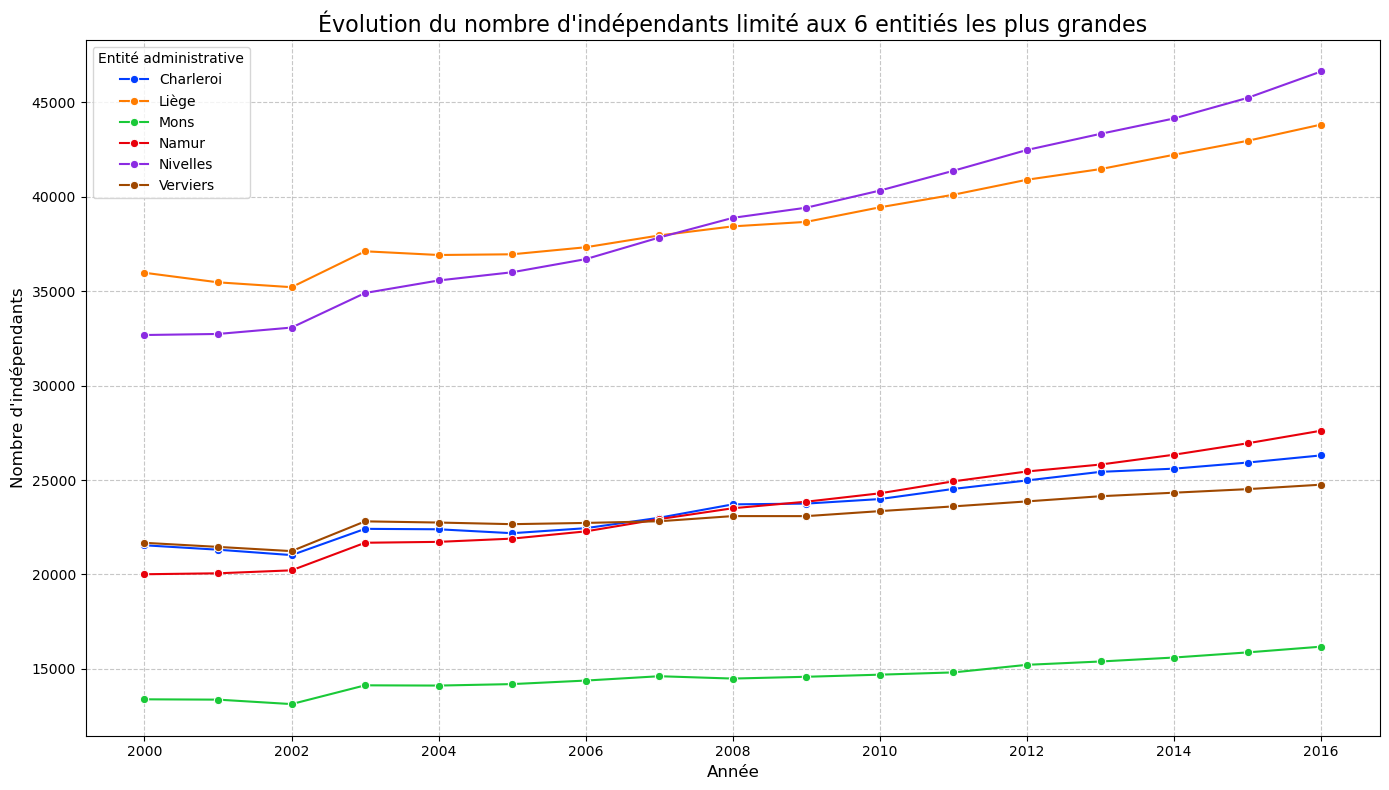

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns


evolution_data = data.groupby(['Annee', 'Entité administrative'])['Nombre d\'indépendants'].sum().reset_index()

top_entities = (
    evolution_data.groupby('Entité administrative')['Nombre d\'indépendants']
    .mean()
    .nlargest(6)
    .index
)

filtered_data = evolution_data[evolution_data['Entité administrative'].isin(top_entities)]

plt.figure(figsize=(14, 8))
sns.lineplot(
    data=filtered_data,
    x='Annee',
    y='Nombre d\'indépendants',
    hue='Entité administrative',
    marker='o',
    palette='bright'
)
plt.title("Évolution du nombre d'indépendants limité aux 6 entitiés les plus grandes", fontsize=16)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre d'indépendants", fontsize=12)
plt.legend(title="Entité administrative", loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


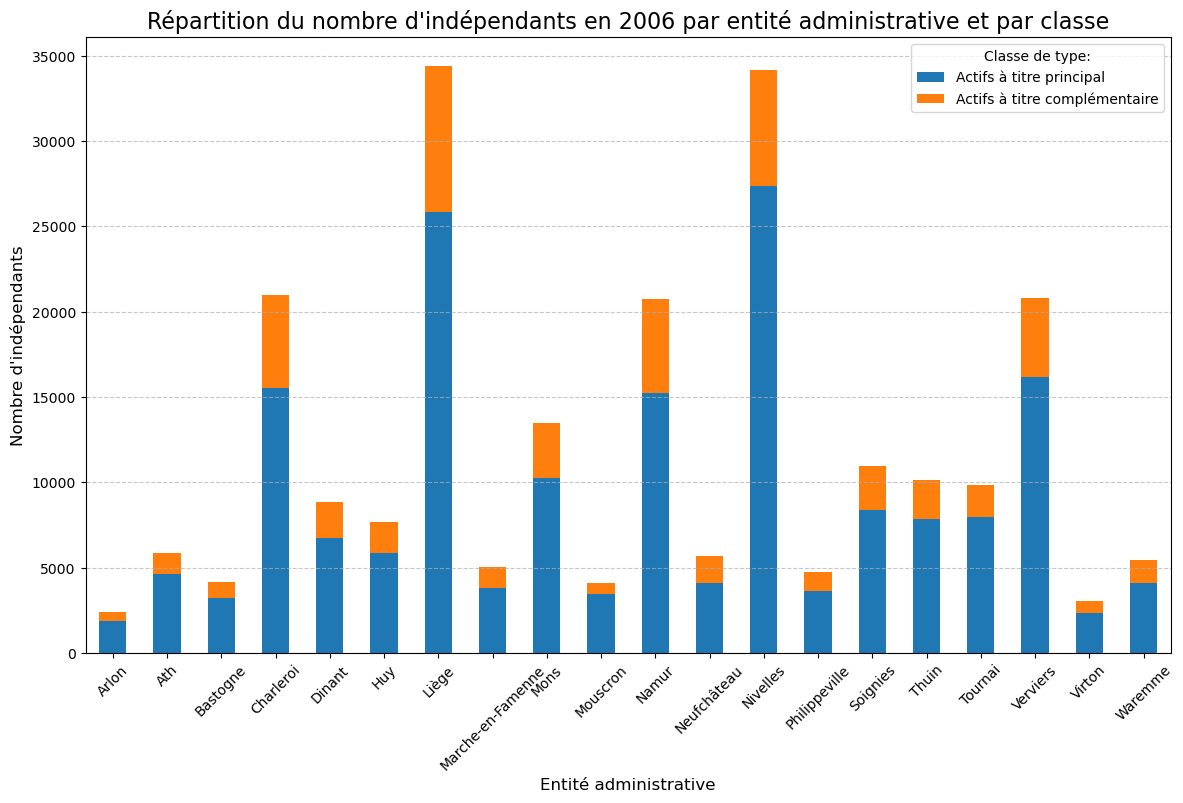

In [82]:
data_2006 = data[data['Annee'] == 2006]

classes = [
    'Entité administrative','Actifs à titre principal', 'Actifs à titre complémentaire'
]
data_2006 = data_2006[classes]

data_2006.set_index('Entité administrative', inplace=True)
data_2006.sort_index(inplace=True)

data_2006.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title("Répartition du nombre d'indépendants en 2006 par entité administrative et par classe", fontsize=16)
plt.xlabel("Entité administrative", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Nombre d'indépendants", fontsize=12)
plt.legend(title="Classe de type:", loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.show()